In [1]:
from numpy import arctan2,random,sin,cos,degrees
from haversine import haversine, Unit
import matplotlib.pyplot as pt
import numpy as np
from math import radians

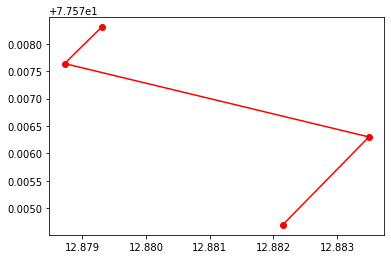

In [2]:
source_lat = 12.882145
source_long = 77.574696
b_lat = 12.883500
b_long= 77.576300
destination_lat = 12.878719
destination_long = 77.577638
c_lat = 12.879300
c_long= 77.578300
#source = np.array([source_lat, source_long])
#destination = np.array([destination_lat, destination_long])
li = np.array([[source_lat, source_long], [b_lat, b_long],[destination_lat, destination_long], [c_lat, c_long]])
xp,yp = zip(*li)
pt.plot(xp,yp, 'o-', color='r')
pt.show()

In [3]:
def heading (source, destination):
    delta =  destination[1] - source[1]
    X = np.cos( destination[0])* np.sin(delta)
    Y = np.cos(source[0])* np.sin(destination[0]) - np.sin(source[0])*np.cos(destination[0])* np.cos(delta)
    bearing = np.arctan2(X,Y)
    dummy = ((np.degrees(bearing)+360) % 360)
    return dummy

In [4]:
def desired_turn(gps_heading, compass_heading):
    targetHeading=gps_heading
    heading=compass_heading
    headingError = heading - targetHeading  
    headingError=headingError
    if (headingError <= 180):
        #print("first:",headingError)
        headingError += 360
    if (headingError > -180):
        #print("second:",headingError)
        headingError -= 360
    #print("converted:", headingError)
    return headingError

In [5]:
def heading2(source, destination):
    dlon = np.radians(destination[1]-source[1])
    cLat = np.radians(source[0])
    tLat = np.radians(destination[0])
    a1 = np.sin(dlon) * np.cos(tLat)
    a2 = np.sin(cLat) * np.cos(tLat) * np.cos(dlon)
    a2 = np.cos(cLat) * np.sin(tLat) - a2
    a2 = np.arctan2(a1, a2)
    if (a2 < 0.0):
    
        a2 += 2*np.pi
    
    targetHeading = np.degrees(a2)
    return targetHeading

In [6]:
def Turning_direction(heading_difference):
    TurningError = heading_difference
    if(TurningError>=5 and TurningError<=10):
        print("Turn left by 15 degrees")
    elif(TurningError>= 11 and  TurningError<=60):
        print("Turn left by 30 degrees")
    elif(TurningError>= -10 and TurningError<=-5):
        print("Turn right by 15 degrees")
    elif(TurningError>= -60 and TurningError<=-11 ):
        print("Turn right by 30 degres")
    elif(TurningError<= -60):
        print("Turn right3 by 90 degrees")
    elif(TurningError>= 60):
        print("Turn left by 90 degrees")
    elif(TurningError<10 and TurningError > -7):
        print("move forward")
    return TurningError

In [7]:

def go_to_waypoint(source, destination):
        for i in range(len(li)-1):
            target_distance = haversine(li[i],li[i+1],unit=Unit.METERS)
            print("Distance between two waypoints:",target_distance)
            if target_distance <=2:
                print("stop moving")
            target_heading = heading(li[i], li[i+1])
            print("Target heading:", target_heading)
            current_heading = int(input("Enter the heading"))
            print("Heading of the bot:", current_heading)
            heading_difference = desired_turn(target_heading, current_heading)
            print("Total heading error:", heading_difference)
            Turning_direction(heading_difference)


In [11]:
    go_to_waypoint(li[i])

NameError: name 'a' is not defined